In [1]:
# docker run --rm -it -p 8890:8890 --gpus=all -v $(pwd)/data:/data --name tasm tasm/tasm:latest /bin/bash

In [18]:
import os
import shutil
import tasm
import time

NOTEBOOK_RESOURCES_PATH = '/data/catalog'
# if os.path.exists(NOTEBOOK_RESOURCES_PATH):
#     shutil.rmtree(NOTEBOOK_RESOURCES_PATH)
# os.mkdir(NOTEBOOK_RESOURCES_PATH)

tasm.configure_environment({
    'default_db_path': os.path.join(NOTEBOOK_RESOURCES_PATH, 'labels.db'),
    'catalog_path': os.path.join(NOTEBOOK_RESOURCES_PATH, 'resources') 
})

In [3]:
DETECTIONS_PATH = '/data/formatted_result.json'
VIDEO_PATH = '/data/traffic-001.mp4'

In [10]:
t = tasm.TASM()
metadata_id = 'traffic-001'

In [9]:
# Load detections.
# import json
# with open(DETECTIONS_PATH) as f:
#     detections = json.load(f)

# metadata_info = []
# bound_width = lambda x : min(max(0, x), 3840)
# bound_height = lambda y: min(max(0, y), 2160)
# for obj, info in detections.items():
#     object_type = info['object_type']
#     for bbox, frame in zip(info['bboxes'], info['tracked_cnt']):
#         x1 = bound_width(bbox[0][0])
#         y1 = bound_height(bbox[0][1])
#         x2 = bound_width(bbox[1][0])
#         y2 = bound_height(bbox[1][1])
#         if frame < 0 or x1 < 0 or y1 < 0 or x2 < 0 or y2 < 0:
#             import pdb; pdb.set_trace()
#         metadata_info.append(tasm.MetadataInfo(metadata_id, object_type, frame, x1, y1, x2, y2))
#         metadata_info.append(tasm.MetadataInfo(metadata_id, obj, frame, x1, y1, x2, y2))

# t.add_bulk_metadata(metadata_info)

In [6]:
# Ingest video untiled.
# t.store(VIDEO_PATH, 'traffic-001')

In [7]:
# Since we know the queries will be for cars, tile around them.
# t.store_with_nonuniform_layout(VIDEO_PATH, "traffic-001-cars", "traffic-001", "car", False)

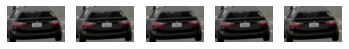

In [16]:
# Look at a specific object.
import matplotlib.pyplot as plt

tiled_selection = t.select('traffic-001-cars', metadata_id, 'car-6607', 0, 54000)
frame_cols = 5
f, axs = plt.subplots(1, frame_cols)
[ax.axis('off') for ax in axs.ravel()]
num_obj = 0
while num_obj < frame_cols:
    car = tiled_selection.next()
    if car.is_empty():
        break
    axs[num_obj].imshow(car.numpy_array())
    num_obj += 1

In [19]:
# Get a video of car-1 crops from untiled video.
t = tasm.TASM()
start = time.perf_counter()
t.get_video_roi(
    '/data/out_videos/car-1-untiled.mp4', # output path
    'traffic-001', # name in TASM
    metadata_id, # metadata identifier in TASM
    'car-1', # label name
    0, # first frame inclusive
    54000 # last frame exclusive
)
end = time.perf_counter()
print('Untiled took ', end - start)

Untiled took  3.8003320917487144


In [20]:
# Get a video of car-1 crops from tiled video.
t = tasm.TASM()
start = time.perf_counter()
t.get_video_roi(
    '/data/out_videos/car-1-tiled.mp4', # output path
    'traffic-001-cars', # name in TASM
    metadata_id, # metadata identifier in TASM
    'car-1', # label name
    0, # first frame inclusive
    54000 # last frame exclusive
)
end = time.perf_counter()
print('Untiled took ', end - start)

Untiled took  0.6545852050185204
